In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CellPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

image 1 
count
 2 
total fluor
 1085.29833984375


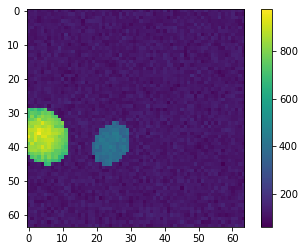

In [2]:
num_images = 1
img_dim = 64 # Needs to be square
img_height = img_dim
img_width = img_dim
max_objects = 8
psf_stdev = 10
background_intensity = 120

prior = CellPrior(max_objects, img_height, img_width)

image_attributes = ImageAttributes(img_height, img_width, max_objects, psf_stdev, background_intensity)

true_counts, true_fluors, true_locs, true_axes, true_angles, true_total_intensities, images = image_attributes.generate(prior, num_images)

for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal fluor\n", true_fluors[i].sum().item())
    fig, img = plt.subplots(1,1)
    _ = img.imshow(images[i].cpu())
    plt.colorbar(_, ax=img)

In [3]:
tile_side_length = 4
max_objects_smc = 2
pad = 2

prior = CellPrior(max_objects_smc,
                  tile_side_length, tile_side_length,
                  pad)

smc = SMCsampler(images[0], image_attributes, tile_side_length, prior,
                 max_objects = max_objects_smc, catalogs_per_block = 200,
                 kernel_num_iters = 100, product_form_multiplier = 500,
                 max_smc_iters = 500)

In [4]:
# tile_side_length = 4
# max_objects_smc = 2
# pad = 2

# prior = CatalogPrior(max_objects_smc,
#                      tile_side_length, tile_side_length,
#                      background_intensity/3.,
#                      pad)

# smc = SMCsampler(images[0], image_attributes, tile_side_length, prior,
#                  max_objects = max_objects_smc, catalogs_per_block = 200,
#                  kernel_num_iters = 100, product_form_multiplier = 500,
#                  max_smc_iters = 500)

# print(f"True count: {true_counts[0]}")
# print(f"True total flux: {true_fluxes[0].sum()}\n")

# smc.run(print_progress = True)
# smc.summarize()